# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#Discussion)
* [Conclusion](#conclusion)



## Introduction <a name="introduction"></a>

In this project we will try to find the ideal location for opening a new restaurant in San Antonio area. San Antonio is the 7th most populous city in the United States. The city is famous for its tourist attractions include the River Walk, the Tower of Americas, SeaWorld. Commercial entertainment like Six Flags and Morgan's Wonderland amusement parks. <br>

We would like to choose a place where there is already has many residents or commercial facilities but not too many restaurants as competition.

To start, we need data of zip code and their population in San Antonio, and we will also use data from Foursquare for information about venues like restaurants, hotels, and other stores. <br>

Firstly, we will explore the population and density distribution by zip code in San Antonio. We will exam the existing restaurants, how they distribute and how many people they serve currently. Then we will also explore the locations of restaurants and other places like gyms, hotels, etc in San Antonio. Finally we will build a regression model to identify the important factors that could affect the number of restaurants. <br>


For the data manipulating and visualization, we will need to import libraries __numpy__, __pandas__, __re__, and __seaborn__.

In [779]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

For the web scraping, we will use library __BeautifulSoup__.

In [ ]:
from bs4 import BeautifulSoup

For using data from Foursquare and creating a map, we will use library __json__, __requests__, __json_normalize__, __folium__, and __matplotlib__.

In [455]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

For clustering, we choose to use dbscan algorithm and we need two libraries: __DBSCAN__ and __StandardScaler__ or __scale__.

In [ ]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import scale

To fit a linear regression model, we need to import __LinearRegression__, and to obtain p values we also need to import __statsmodels.formula.api__, which can give us R styleformulas.

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics

## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required information:
* coordinate of San Antonio counties zip code will be obtained by scaping from website **http://sanantonio.areaconnect.com/zip2.htm?city=San%20Antonio&qs=TX&searchtype=bycity**
* population of San Antonio counties will be obtained by scaping from website **http://zipatlas.com/us/tx/san-antonio/zip-code-comparison/population-density.htm**
* number of venues and their categories and location in every zipcode will be obtained using **Foursquare API**

### Zip code dataset

We will get the zip code and their corresponding latitude and longtitude for the city of San Antonio.

In [780]:
url='http://sanantonio.areaconnect.com/zip2.htm?city=San%20Antonio&qs=TX&searchtype=bycity'

source=requests.get(url).text

soup = BeautifulSoup(source, 'html5lib')

#soup

#print(soup.prettify())


In [449]:
match=soup.find('div', class_='row')
print(match)

<div class="row header">
				<div class="block zip1 header">Zip
				</div>
				<div class="block zip2 header">City
				</div>
				<div class="block zip3 header">State
				</div>
				<div class="block zip4 header">Area Code
				</div>
				<div class="block zip5 header">County
				</div>
				<div class="block zip6 header">Latitude
				</div>
				<div class="block zip7 header">Longitude
				</div>
				 <br/>
			</div>


In [450]:
zipc=soup.find_all('div', class_='block zip1')
county=soup.find_all('div', class_='block zip5')
lat=soup.find_all('div', class_='block zip6')
lon=soup.find_all('div', class_='block zip7')

In [451]:
for i in range(len(zipc)-1):
    #zip
    zipc[i]=zipc[i].b.text
    #county
    county[i]=county[i].contents
    county[i]=''.join(str(e) for e in county[i])
    county[i]=re.sub('\s+','',county[i])
    #lat
    lat[i]=lat[i].contents
    lat[i]=''.join(str(e) for e in lat[i])
    lat[i]=re.sub('\s+','',lat[i])
    #lon
    lon[i]=lon[i].contents
    lon[i]=''.join(str(e) for e in lon[i])
    lon[i]=re.sub('\s+','',lon[i])

In [452]:
z=[]
c=[]
la=[]
lo=[]
for i in range(len(zipc)-1):
    z.append(zipc[i])
    c.append(county[i])
    la.append(lat[i])
    lo.append(lon[i])
    

In [453]:
dic={'zip_code':z, 'county':c, 'lat': la, 'long': lo}

df=pd.DataFrame(dic)
df.head()

,zip_code,county,lat,long
0,78201,Bexar,29.472,-98.537
1,78202,Bexar,29.422,-98.466
2,78203,Bexar,29.415,-98.462
3,78204,Bexar,29.397,-98.500
4,78205,Bexar,29.424,-98.487


In [454]:
df.shape

(88, 4)

### population dataset

In [781]:
url='http://zipatlas.com/us/tx/san-antonio/zip-code-comparison/population-density.htm'

source=requests.get(url).text

soup = BeautifulSoup(source, 'html5lib')

#soup

#print(soup.prettify())

In [458]:
match=soup.find_all('td', class_='report_data')
#print(match)
print(match[0])
print(match[1].a.text)
print(match[2].text)
print(match[3].a.text)
print(match[4].text)
print(match[5].text)
print(match[6])

<td align="right" class="report_data">1.</td>
78207
29.422300, -98.524805
San Antonio
56,348
7,554.55
<td align="right" class="report_data">#909</td>


In [459]:
zc=[]
la=[]
pop=[]
den=[]
for i in range(1,len(match),7):
    #print(i)
    zc.append(match[i].a.text)
    la.append(match[i+1].text)
    pop.append(match[i+3].text)
    den.append(match[i+4].text)

In [460]:
print(zc)
print(la)
print(pop)
print(den)

['78207', '78225', '78201', '78237', '78228', '78210', '78208', '78202', '78250', '78213', '78229', '78212', '78239', '78204', '78240', '78203', '78209', '78230', '78248', '78242', '78217', '78244', '78232', '78247', '78211', '78233', '78216', '78218', '78220', '78238', '78231', '78227', '78224', '78249', '78251', '78214', '78215', '78205', '78226', '78234', '78223', '78219', '78245', '78221', '78222', '78258', '78236', '78256', '78235', '78259', '78260', '78253', '78255', '78252', '78264', '78263', '78257', '78266', '78254', '78261']
['29.422300, -98.524805', '29.387937, -98.526571', '29.469087, -98.529395', '29.420924, -98.566465', '29.460646, -98.571279', '29.395737, -98.466616', '29.439930, -98.458718', '29.428207, -98.461236', '29.510075, -98.663687', '29.520879, -98.523369', '29.505502, -98.577033', '29.464611, -98.493653', '29.516184, -98.361849', '29.404404, -98.505028', '29.525292, -98.604382', '29.415255, -98.460204', '29.488728, -98.457602', '29.545289, -98.556564', '29.5900

In [461]:
pop_dat=list(zip(zc,pop,den))
pop_dat=pd.DataFrame(pop_dat)
pop_dat.columns=['zip_code','population','density']

pop_dat.population=[i.replace(',','') for i in pop_dat.population]
pop_dat.density=[i.replace(',','') for i in pop_dat.density]

pop_dat.population=pd.to_numeric(pop_dat.population)
pop_dat.density=pd.to_numeric(pop_dat.density)
pop_dat.head()

,zip_code,population,density
0,78207,56348,7554.55
1,78225,13553,6850.89
2,78201,47387,6664.58
3,78237,36273,5270.83
4,78228,58091,5240.63


Now we can merge the population data with the county dataset.

In [462]:
df=df.merge(pop_dat,on='zip_code')
df.head()
print(df.shape)

(60, 6)


In [484]:
df.head()

,zip_code,county,lat,long,population,density
0,78201,Bexar,29.472,-98.537,47387,6664.58
1,78202,Bexar,29.422,-98.466,11746,5026.90
2,78203,Bexar,29.415,-98.462,5845,4073.78
3,78204,Bexar,29.397,-98.500,11905,4332.32
4,78205,Bexar,29.424,-98.487,1564,1472.21


### Foursquare API

#### Define Foursquare Credentials and Version

In [465]:
CLIENT_ID = 'KNUBP2IFJGCWZYEMOXZV3GVPY20GIG4U2W5VSLJRTBPSKSEE' # your Foursquare ID
CLIENT_SECRET = 'IFXYEVUSWI4AY5X2PWIQQHMEQB1ZAQGLVZWAACDFRKQRY23W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KNUBP2IFJGCWZYEMOXZV3GVPY20GIG4U2W5VSLJRTBPSKSEE
CLIENT_SECRET:IFXYEVUSWI4AY5X2PWIQQHMEQB1ZAQGLVZWAACDFRKQRY23W


In [467]:
neighborhood_latitude = df.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'long'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'zip_code'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 78201 are 29.472, -98.537.


#### Now, let's get the top 100 venues that are in zipcode 78201 within a radius of 500 meters.

In [468]:
# type your answer here
search_query = 'Store'
radius = 500
LIMIT=100

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?client_id=KNUBP2IFJGCWZYEMOXZV3GVPY20GIG4U2W5VSLJRTBPSKSEE&client_secret=IFXYEVUSWI4AY5X2PWIQQHMEQB1ZAQGLVZWAACDFRKQRY23W&ll=29.472,-98.537&v=20180605&radius=500&limit=100'

In [469]:
results = requests.get(url).json()

In [471]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [472]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Original Donut Shop,Donut Shop,29.472703,-98.534598
1,Restaurant Depot,Kitchen Supply Store,29.473163,-98.535505
2,Redbox,Video Store,29.473317,-98.534868
3,Walgreens,Pharmacy,29.473850,-98.534403
4,Bill Miller,BBQ Joint,29.472299,-98.533515


In [473]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


In [474]:
nearby_venues.categories

0              Donut Shop
1    Kitchen Supply Store
2             Video Store
3                Pharmacy
4               BBQ Joint
5       Convenience Store
6      Mexican Restaurant
7              Donut Shop
Name: categories, dtype: object

#### Function for all neighbourhood

In [475]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zipcode', 
                  'zipcode Latitude', 
                  'zipcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [476]:
sa_venues = getNearbyVenues(names=df['zip_code'],
                                   latitudes=df['lat'],
                                   longitudes=df['long'])

78201
78202
78203
78204
78205
78207
78208
78209
78210
78211
78212
78213
78214
78215
78216
78217
78218
78219
78220
78221
78222
78223
78224
78225
78226
78227
78228
78229
78230
78231
78232
78233
78234
78235
78236
78237
78238
78239
78240
78242
78244
78245
78247
78248
78249
78250
78251
78252
78253
78254
78255
78256
78257
78258
78259
78260
78261
78263
78264
78266


In [477]:
print(sa_venues.shape)
sa_venues.head()

(439, 7)


,zipcode,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,78201,29.472,-98.537,Original Donut Shop,29.472703,-98.534598,Donut Shop
1,78201,29.472,-98.537,Restaurant Depot,29.473163,-98.535505,Kitchen Supply Store
2,78201,29.472,-98.537,Redbox,29.473317,-98.534868,Video Store
3,78201,29.472,-98.537,Walgreens,29.473850,-98.534403,Pharmacy
4,78201,29.472,-98.537,Bill Miller,29.472299,-98.533515,BBQ Joint


In [478]:
sa_venues.groupby('zipcode').count()

,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
zipcode,,,,,,
78201,8,8,8,8,8,8
78202,5,5,5,5,5,5
78203,4,4,4,4,4,4
78204,5,5,5,5,5,5
78205,100,100,100,100,100,100
78207,5,5,5,5,5,5
78208,9,9,9,9,9,9
78209,16,16,16,16,16,16
78210,6,6,6,6,6,6


In [479]:
print('There are {} uniques categories.'.format(len(sa_venues['Venue Category'].unique())))
print(sa_venues['Venue Category'].unique())

There are 150 uniques categories.
['Donut Shop' 'Kitchen Supply Store' 'Video Store' 'Pharmacy' 'BBQ Joint'
 'Convenience Store' 'Mexican Restaurant' 'Grocery Store' 'Food'
 'Clothing Store' 'Electronics Store' 'Gym / Fitness Center'
 'Historic Site' 'Fried Chicken Joint' 'Park' 'Fast Food Restaurant'
 'Seafood Restaurant' 'Pedestrian Plaza' 'History Museum' 'Dessert Shop'
 'Plaza' 'Sandwich Place' 'New American Restaurant' 'Bistro'
 'Brazilian Restaurant' 'Art Museum' 'Steakhouse' 'Hotel' 'Sports Bar'
 'German Restaurant' 'Neighborhood' 'Theater' 'Cocktail Bar' 'Museum'
 'Ice Cream Shop' 'Restaurant' 'Nightclub' 'Piano Bar'
 'American Restaurant' 'Chocolate Shop' 'Hotel Bar' 'Concert Hall'
 'Theme Restaurant' 'Lingerie Store' 'Shopping Mall' 'Burger Joint'
 'Bakery' 'Bar' 'Movie Theater' 'Lounge' 'Latin American Restaurant' 'Pub'
 'Gift Shop' 'General Entertainment' 'Fountain' 'Italian Restaurant'
 'Wine Bar' 'Monument / Landmark' 'Asian Restaurant' 'Bridge'
 'Mediterranean Restaurant

Beside for restaurant, we also want to select some major categories from them. For now, we will choose hotel, gym, park, convenience store, grocery stor, fast food.

In [480]:
sa_hotel=sa_venues[sa_venues['Venue Category'].str.contains('Hotel')]
sa_gym=sa_venues[sa_venues['Venue Category'].str.contains('Gym')]
sa_park=sa_venues[sa_venues['Venue Category'].str.contains('Park')]
sa_cstore=sa_venues[sa_venues['Venue Category'].str.contains('Convenience Store')]
sa_gstore=sa_venues[sa_venues['Venue Category'].str.contains('Grocery Store')]
sa_rest=sa_venues[sa_venues['Venue Category'].str.contains('Restaurant')]
sa_fast=sa_venues[sa_venues['Venue Category'].str.contains('Fast Food')]

print(sa_hotel.shape, sa_gym.shape, sa_park.shape,sa_cstore.shape,sa_gstore.shape,sa_rest.shape,sa_fast.shape)

(23, 7) (16, 7) (5, 7) (10, 7) (8, 7) (78, 7) (17, 7)


In [482]:
dic={'gym':sa_gym,'hotel':sa_hotel,'park':sa_park,'cstore':sa_cstore,'gstore':sa_gstore,
     'rest':sa_rest,'fast':sa_fast}
df_all=df
for i in ['gym','hotel','park','cstore','gstore','rest','fast']:
    dic[i]=dic[i][['zipcode','Venue Category']].groupby('zipcode').count()

    dic[i].columns=dic[i].columns+'_'+i
    dic[i].reset_index(inplace=True)
    df_all=df_all.merge(dic[i],how='left',left_on='zip_code',right_on='zipcode')

df_all.head()

,zip_code,county,lat,long,population,density,zipcode_x,Venue Category_gym,zipcode_y,Venue Category_hotel,zipcode_x,Venue Category_park,zipcode_y,Venue Category_cstore,zipcode_x,Venue Category_gstore,zipcode_y,Venue Category_rest,zipcode,Venue Category_fast
0,78201,Bexar,29.472,-98.537,47387,6664.58,NaN,NaN,NaN,NaN,NaN,NaN,78201,1.0,NaN,NaN,78201,1.0,NaN,NaN
1,78202,Bexar,29.422,-98.466,11746,5026.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78202,1.0,78202,1.0,NaN,NaN
2,78203,Bexar,29.415,-98.462,5845,4073.78,78203,1.0,NaN,NaN,78203,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78204,Bexar,29.397,-98.500,11905,4332.32,NaN,NaN,NaN,NaN,NaN,NaN,78204,1.0,NaN,NaN,78204,2.0,78204,1.0
4,78205,Bexar,29.424,-98.487,1564,1472.21,NaN,NaN,78205,19.0,78205,1.0,NaN,NaN,NaN,NaN,78205,18.0,NaN,NaN


In [483]:
cols = [c for c in df_all.columns if c.lower()[:7] != 'zipcode']
df_all=df_all[cols]
df_all=df_all.fillna(0)
cols=[i.replace('Venue Category_','') for i in cols]
df_all.columns=cols
df_all.head(10)

,zip_code,county,lat,long,population,density,gym,hotel,park,cstore,gstore,rest,fast
0,78201,Bexar,29.472,-98.537,47387,6664.58,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,78202,Bexar,29.422,-98.466,11746,5026.90,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,78203,Bexar,29.415,-98.462,5845,4073.78,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,78204,Bexar,29.397,-98.500,11905,4332.32,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,78205,Bexar,29.424,-98.487,1564,1472.21,0.0,19.0,1.0,0.0,0.0,18.0,0.0
5,78207,Bexar,29.422,-98.523,56348,7554.55,1.0,0.0,0.0,0.0,0.0,4.0,2.0
6,78208,Bexar,29.438,-98.457,5079,5130.21,0.0,2.0,0.0,1.0,0.0,3.0,2.0
7,78209,Bexar,29.488,-98.457,40675,3848.79,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,78210,Bexar,29.399,-98.470,37345,5148.26,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,78211,Bexar,29.357,-98.560,31214,2699.50,0.0,0.0,0.0,0.0,0.0,2.0,1.0


## Methodology <a name="methodology"></a>

In this project, we assume that there would be many factors that could affect the decision to open a restaurants such as population, number of hotels, gyms, shops etc.

In the first step, we will explore the distribution of the number of restaurants and population by visualization.
Secondly, we will try to find the areas which have similar characteristics by using DBSCAN clustering algorithm.

In the final step, we will use linear regression model to find the significant factors and based on those factors we make recommendation the ideal location for opening a new.

## Results <a name="results"></a>

### 1. Visualize Each Neighborhood

Firstly, let's create a map of San Antonio with zipcode superimposed on top.

In [456]:
# create map of San Antonio using latitude and longitude values
map_t = folium.Map(location=[df.lat[0], df.long[0]], zoom_start=10)

# add markers to map
for lat, lng, county, zipcode in zip(df['lat'], 
                                           df['long'], 
                                           df['county'], 
                                           df['zip_code']):
    label = '{}, {}'.format(zipcode, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t)  
    
map_t

Secondly, let's look at the population and density.

In [564]:
# create map of San Antonio with population using latitude and longitude values
map_t = folium.Map(location=[df.lat[0], df.long[0]], zoom_start=10)

for lat, lng, p,z in zip(df['lat'],df['long'],df['population'],df['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p/30,
        popup=z,
        color='crimson',
        fill=True,
        fill_color='#ffb3b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t) 
    
    
map_t

We can see that population is spread out the San Antonio but more in the north part. The zipcode with the most population is 78250 which is located in the northwest of San Antonio. How about the population density?

In [565]:
# create map of San Antonio with density using latitude and longitude values
map_t = folium.Map(location=[df.lat[0], df.long[0]], zoom_start=10)

for lat, lng, p, z in zip(df['lat'],df['long'],df['density'],df['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p/3,
        popup=z,
        color='crimson',
        fill=True,
        fill_color='#ffb3b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t)   
    
map_t

The density looks a little different. The center has the highest density, especially 78207, 78221, and 78225.
Then let's explore more on map! We will put number of restaurants on the map too.

In [567]:
map_t = folium.Map(location=[df_all.lat[0], df_all.long[0]], zoom_start=10)
   
for lat, lng, p, z in zip(df_all['lat'],df_all['long'],df_all['population'], df_all['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p/30,
        popup=z,
        color='crimson',
        fill=True,
        fill_color='#ffb3b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t) 
    
    
    
for lat, lng, p, z in zip(df_all['lat'],df_all['long'],df_all['rest'], df_all['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p*200,
        popup=z,
        color='slateblue',
        fill=True,
        fill_color='lightsteelblue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t) 
    
    
map_t

Red represent population and blue represent restaurants. We can see there is imbalance of distribution of restaurants and population. Most restaurants are located in the center of San Antonio, especially cumulated in 78205, which is downtown. 78227 also has a lot of restaurants. In some parts there are high in population but has not many restaurants such as 78250,  78228, and 78240.

Now let's try density and restaurants.

In [571]:
map_t = folium.Map(location=[df_all.lat[0], df_all.long[0]], zoom_start=11)
   
for lat, lng, p, z in zip(df_all['lat'],df_all['long'],df_all['density'], df_all['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p/3,
        popup=z,
        color='crimson',
        fill=True,
        fill_color='#ffb3b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t) 
    
    
    
for lat, lng, p, z in zip(df_all['lat'],df_all['long'],df_all['rest'], df_all['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p*200,
        popup=z,
        color='slateblue',
        fill=True,
        fill_color='lightsteelblue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t) 
    
    
map_t

Now red represent population density and 78250 has still low number of restaurants. 78201 and 78228 also have similar situation. 78205, 78215 and 78227 seems to have plenty of restaurants compared to its population density.

From the both maps, we can see that 78205 has most of the restaurants. Riverwalk is the famous tourist attraction in San Antonio and it is located in 78205 and 78215 so the restaurants are very crowded there. 78227 and 78232 also have many restaurants. 78227 is along the Loop 410 and 78232 is located in stone oak.

Now let's calculate the ratio of restaurants number and population.

In [755]:
df_ratio=df_all.copy()
df_ratio['ratio']=df_ratio['rest']/df_ratio['population']

map_t = folium.Map(location=[df_all.lat[0], df_all.long[0]], zoom_start=11)
   
for lat, lng, p, z in zip(df_ratio['lat'],df_ratio['long'],df_ratio['ratio'], df_all['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p*300000,
        popup=z,
        color='crimson',
        fill=True,
        fill_color='#ffb3b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t) 
   
map_t

Let's make a bar plot for the ratio. We see very unbalanced results for the ratio variable. Let's sort the ratio columne and we will suggest to avoid area that is already crowded with restaurants.

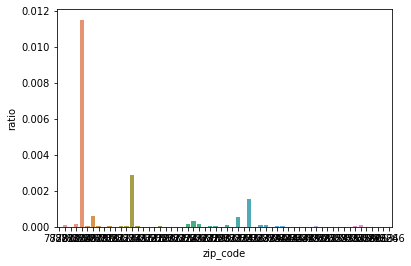

In [756]:
sns.barplot(x='zip_code',y='ratio', data=df_ratio)

We will use 0.0001 as a cutoff value for ratio, so we would exclude zip code 78205, 78215, 78236, 78208, 78234, 78226, 78204, 78227, 78225, 78232, 78259.

In [760]:
df_ratio_sort=df_ratio.sort_values(by=['ratio'], ascending=False)
zip_exclude=df_ratio_sort.zip_code[df_ratio_sort.ratio>0.0001]
print(zip_exclude)

4     78205
13    78215
34    78236
6     78208
32    78234
24    78226
3     78204
25    78227
23    78225
30    78232
54    78259
Name: zip_code, dtype: object


### 2. Clustering the zipcode

In [413]:
sa_venues.head()

,zipcode,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,78201,29.472,-98.537,Original Donut Shop,29.472703,-98.534598,Donut Shop
1,78201,29.472,-98.537,Restaurant Depot,29.473163,-98.535505,Kitchen Supply Store
2,78201,29.472,-98.537,Redbox,29.473317,-98.534868,Video Store
3,78201,29.472,-98.537,Walgreens,29.473850,-98.534403,Pharmacy
4,78201,29.472,-98.537,Bill Miller,29.472299,-98.533515,BBQ Joint


In [607]:
# one hot encoding
sa_onehot = pd.get_dummies(sa_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sa_onehot['zipcode'] = sa_venues['zipcode'] 

# move zipcode column to the first column
a1=sa_onehot.columns.values[sa_onehot.columns.values=='zipcode']
a2=sa_onehot.columns.values[sa_onehot.columns.values!='zipcode']

sa_onehot = sa_onehot[[*a1,*a2]]

Next, let's group rows by zipcode and by taking the mean of the frequency of occurrence of each category.

In [691]:
sa_grouped = sa_onehot.groupby('zipcode').mean().reset_index()
sa_venues=sa_grouped

In [692]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [693]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        

sa_venues_sorted = pd.DataFrame(columns=columns)

sa_venues_sorted['zipcode'] = sa_grouped['zipcode']

for ind in np.arange(sa_grouped.shape[0]):
    sa_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sa_venues.iloc[ind, :], num_top_venues)

sa_venues_sorted.head()

,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,78201,Donut Shop,BBQ Joint,Video Store,Convenience Store,Pharmacy
1,78202,Electronics Store,Food,Grocery Store,Clothing Store,Mexican Restaurant
2,78203,Park,Historic Site,Fried Chicken Joint,Gym / Fitness Center,Wings Joint
3,78204,BBQ Joint,Seafood Restaurant,Convenience Store,Fast Food Restaurant,Food
4,78205,Hotel,Bar,Steakhouse,Ice Cream Shop,Theater


In [694]:
sa_grouped_clustering = sa_grouped.drop('zipcode', 1)

epsilon = 0.5
minimumSamples = 2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(sa_grouped_clustering)

sa_grouped.insert(0, 'Cluster Labels', db.labels_)
sa_venues_sorted.insert(0, 'Cluster Labels', db.labels_)
sa_grouped['Cluster Labels'].value_counts()

 0    28
-1    21
 1     2
Name: Cluster Labels, dtype: int64

In [695]:
sa_grouped2=sa_grouped.merge(df_all, left_on='zipcode',right_on='zip_code')
sa_grouped2.head()

,Cluster Labels,zipcode,Accessories Store,Advertising Agency,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,long,population,density,gym,hotel,park,cstore,gstore,rest,fast
0,0,78201,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,-98.537,47387,6664.58,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,78202,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,-98.466,11746,5026.90,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1,78203,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,-98.462,5845,4073.78,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,78204,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,-98.500,11905,4332.32,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,0,78205,0.0,0.0,0.03,0.0,0.0,0.01,0.01,0.0,...,-98.487,1564,1472.21,0.0,19.0,1.0,0.0,0.0,18.0,0.0


Visualize the resulting clusters

In [696]:
# create map
map_clusters = folium.Map(location=[df_all.lat[0], df_all.long[0]], zoom_start=11)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, z, r, cluster in zip(sa_grouped2['lat'], 
                                  sa_grouped2['long'], 
                                  sa_grouped2['zipcode'], 
                                  sa_grouped2['rest'],
                                  sa_grouped2['Cluster Labels']):
    label = folium.Popup(str(z) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=r,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

As shown in the map, green category was labeled "-1" and they do not belong to any clusters so counted as noise. We can explore more by looking at each cluster.

In [697]:
sa_venues_sorted2=sa_venues_sorted.merge(df_all, left_on='zipcode',right_on='zip_code')
sa_venues_sorted2['sum']=sa_venues_sorted2[['gym','hotel','park','cstore','gstore','rest','fast']].sum(axis=1)
sa_venues_sorted2.head()

,Cluster Labels,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,zip_code,county,lat,...,population,density,gym,hotel,park,cstore,gstore,rest,fast,sum
0,0,78201,Donut Shop,BBQ Joint,Video Store,Convenience Store,Pharmacy,78201,Bexar,29.472,...,47387,6664.58,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
1,0,78202,Electronics Store,Food,Grocery Store,Clothing Store,Mexican Restaurant,78202,Bexar,29.422,...,11746,5026.90,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
2,-1,78203,Park,Historic Site,Fried Chicken Joint,Gym / Fitness Center,Wings Joint,78203,Bexar,29.415,...,5845,4073.78,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0,78204,BBQ Joint,Seafood Restaurant,Convenience Store,Fast Food Restaurant,Food,78204,Bexar,29.397,...,11905,4332.32,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0
4,0,78205,Hotel,Bar,Steakhouse,Ice Cream Shop,Theater,78205,Bexar,29.424,...,1564,1472.21,0.0,19.0,1.0,0.0,0.0,18.0,0.0,38.0


In [698]:
sa_venues_sorted2.loc[sa_grouped['Cluster Labels'] == -1, ]

,Cluster Labels,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,zip_code,county,lat,...,population,density,gym,hotel,park,cstore,gstore,rest,fast,sum
2,-1,78203,Park,Historic Site,Fried Chicken Joint,Gym / Fitness Center,Wings Joint,78203,Bexar,29.415,...,5845,4073.78,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
10,-1,78212,Locksmith,Wings Joint,Entertainment Service,Food & Drink Shop,Food,78212,Bexar,29.462,...,31220,4625.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,-1,78217,Advertising Agency,Gas Station,Gym,Pet Store,Wings Joint,78217,Bexar,29.544,...,32502,2981.79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,-1,78220,Fried Chicken Joint,Pharmacy,Mexican Restaurant,Wings Joint,Farmers Market,78220,Bexar,29.411,...,16668,2339.54,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23,-1,78228,Mexican Restaurant,Wings Joint,Farmers Market,Food & Drink Shop,Food,78228,Bexar,29.460,...,58091,5240.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
26,-1,78231,Pool,Grocery Store,Wings Joint,Entertainment Service,Food,78231,Bexar,29.577,...,7615,2107.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
28,-1,78233,Warehouse Store,Wings Joint,Electronics Store,Food,Flower Shop,78233,Bexar,29.554,...,36065,2691.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,-1,78235,Gym,Basketball Court,Wings Joint,Farmers Market,Food & Drink Shop,78235,Bexar,29.342,...,692,339.62,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
32,-1,78237,Convenience Store,General Entertainment,Wings Joint,Entertainment Service,Food,78237,Bexar,29.423,...,36273,5270.83,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35,-1,78242,Fast Food Restaurant,Wings Joint,Food Truck,Food & Drink Shop,Food,78242,Bexar,29.354,...,28786,3180.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [699]:
sa_venues_sorted2.loc[sa_grouped['Cluster Labels'] == 0, ]

,Cluster Labels,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,zip_code,county,lat,...,population,density,gym,hotel,park,cstore,gstore,rest,fast,sum
0,0,78201,Donut Shop,BBQ Joint,Video Store,Convenience Store,Pharmacy,78201,Bexar,29.472,...,47387,6664.58,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
1,0,78202,Electronics Store,Food,Grocery Store,Clothing Store,Mexican Restaurant,78202,Bexar,29.422,...,11746,5026.90,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
3,0,78204,BBQ Joint,Seafood Restaurant,Convenience Store,Fast Food Restaurant,Food,78204,Bexar,29.397,...,11905,4332.32,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0
4,0,78205,Hotel,Bar,Steakhouse,Ice Cream Shop,Theater,78205,Bexar,29.424,...,1564,1472.21,0.0,19.0,1.0,0.0,0.0,18.0,0.0,38.0
5,0,78207,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center,Wings Joint,Entertainment Service,78207,Bexar,29.422,...,56348,7554.55,1.0,0.0,0.0,0.0,0.0,4.0,2.0,7.0
6,0,78208,Fast Food Restaurant,Hotel,BBQ Joint,Burger Joint,Convenience Store,78208,Bexar,29.438,...,5079,5130.21,0.0,2.0,0.0,1.0,0.0,3.0,2.0,8.0
7,0,78209,Ice Cream Shop,Spa,Gift Shop,Pizza Place,Organic Grocery,78209,Bexar,29.488,...,40675,3848.79,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
8,0,78210,Pizza Place,Convenience Store,Steakhouse,Furniture / Home Store,Gourmet Shop,78210,Bexar,29.399,...,37345,5148.26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0,78211,Fast Food Restaurant,Gas Station,Donut Shop,Bank,Mexican Restaurant,78211,Bexar,29.357,...,31214,2699.50,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0
11,0,78213,Fast Food Restaurant,Wings Joint,Grocery Store,Gas Station,Mexican Restaurant,78213,Bexar,29.512,...,39477,4671.63,1.0,0.0,0.0,1.0,1.0,3.0,2.0,8.0


In [700]:
sa_venues_sorted2.loc[sa_grouped['Cluster Labels'] == 1, ]

,Cluster Labels,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,zip_code,county,lat,...,population,density,gym,hotel,park,cstore,gstore,rest,fast,sum
17,1,78219,Business Service,Wings Joint,Farmers Market,Food & Drink Shop,Food,78219,Bexar,29.440,...,14169,934.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,1,78222,Business Service,Wings Joint,Farmers Market,Food & Drink Shop,Food,78222,Bexar,29.387,...,15203,744.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cluster label "1" contains only 2 areas 78219 and 78222. These two areas have little population and density, and the no ohter commercial facilities like hotel, gym, grocery stores etc.

Cluster label "-1" which is counted noise the places like grocery store or hotel are very little, no more than 1 and the sum of popular places no more than 2.

Cluster label "0" contains areas which have most residents or commercial facilities.

Considering we prefer to open the new restaurant in a commercial place but not too many restaurants existing, we would like to choose cluster 0 but exclude the zip code with high ratio of restaurants and population.

In [768]:
cluster0=sa_venues_sorted2.loc[sa_grouped['Cluster Labels'] == 0, ]
cluster0_exclude=cluster0[~cluster0.zipcode.isin(zip_exclude)]
cluster0_exclude.zipcode

0     78201
1     78202
5     78207
7     78209
8     78210
9     78211
11    78213
12    78214
14    78216
16    78218
24    78229
25    78230
33    78238
34    78239
36    78244
40    78250
43    78254
47    78258
Name: zipcode, dtype: object

## 3. Linear regression

Before we fit linear regression model, we will scale population and density first.

In [372]:
df_all['population2'] = scale( df_all['population'], axis=0, with_mean=True, with_std=True, copy=True )
df_all['density2'] = scale( df_all['density'], axis=0, with_mean=True, with_std=True, copy=True )

Now, fit the model.

In [407]:
lm1 = smf.ols(formula='rest ~ population2+density2+hotel+park+cstore+gstore+gym+fast', data=df_all).fit()

X=df_all[['population2','density2','hotel','park','cstore','gstore','gym','fast']]
reg = LinearRegression()
reg.fit(X, df_all.rest)
reg.score(X, df_all.rest)

0.8110576083043322

By building a multiple linear regression model, we got R square = 0.81, which is not bad.

In [753]:
var=X.columns.values
var=np.append('intercept',var)
var=var.tolist()
coef=np.append(reg.intercept_,reg.coef_)
coef=coef.tolist()
pv=lm1.pvalues
mod=pd.DataFrame(list(zip(var,coef,pv)),columns=['var','coef','pv'])
mod

,var,coef,pv
0,intercept,0.488036,1.987890e-02
1,population2,0.377308,9.005459e-02
2,density2,-0.137000,5.702830e-01
3,hotel,0.896773,8.241567e-17
4,park,0.824746,2.144398e-01
5,cstore,0.507679,2.705105e-01
6,gstore,0.202952,6.376952e-01
7,gym,0.181149,5.010400e-01
8,fast,0.940187,8.714539e-03


So we have:

\begin{align}
\mathbf{Restauraunt} & = \mathbf{0.488+0.377Population-0.137Density+0.897Hotel+0.825Park+0.508Convenient Store+0.203Grocery Store+0.181Gym+0.94Fast Food} \\
\end{align}
And __Hotels__ and __Fast Food stores__ is significant factors that affect the number of restaurants.

We consider significance at p value 0.05 level. So Hotel and fast food are significant. The coefficients for hotel is about 0.90 and for fast food is 0.94, meaning that there are positive linear relationship between the number of restaurants and hotel as well as fast food store. About one unit increasing of hotel and fast food store associate with one more restaurants in each zip code area.

Let's look at cluster 0 dataset again and try to find the area with most hotels and fast food stores.

In [777]:
cluster0_exclude['sum']=cluster0_exclude[['hotel','fast']].sum(axis=1)
choose=cluster0_exclude.sort_values(by=['sum'], ascending=False)
choose.zipcode[choose['sum']>0]

C:\Users\liuq4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5     78207
11    78213
9     78211
36    78244
34    78239
Name: zipcode, dtype: object

OK, now let's show those area on the map.

In [778]:
map_t = folium.Map(location=[df_all.lat[0], df_all.long[0]], zoom_start=11)
   
for lat, lng, p, z in zip(choose['lat'],choose['long'],choose['sum'], choose['zip_code']):
    
    folium.Circle(
        [lat, lng],
        radius=p*300,
        popup=z,
        color='crimson',
        fill=True,
        fill_color='#ffb3b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t) 
   
map_t

As we can see on the map, the ideal place to open a new restaurant we will recommend is __78207__ and __78213__, and then 78211, 78244, 78239 would be our second recommendation.

## Discussion <a name="Discussion"></a>

In the future work, we can add more potential factors that could affect the decision to open a new restaurant such school rating, house price, rental price, or customer reviews of other restaurants. We may also consider what type of restaurant that is going to open. We can build the model to predict if a restaurant is open in a certain area, is it going to be successful or not.

## Conclusion <a name="conclusion"></a>

The purpose of this project is to find a location for openning a new restaurant in the city of San Antonio. We considered the distribution of San Antonio population and the existing restaurant density. We decided to avoid the area with too many restaurant, but at the same time we recommend the area with plenty residents and commerical facilities. Based on those considerations, we filtered the zip codes with high restaurant density, and then cluster the zip codes by venues, and choose the cluster with most commercial facilities. We found the most significant factors are hotels and fast food stores by fitting regression model, so we made recommendation for the ideal areas with the most hotels and fast food stores located in. 

In conclusion, 78207 and 78213 will be our first choice, then followed by 78211, 78244, and 78239.